In [ ]:
import pandas as pd
import numpy as np

#**1) Load and Explore the Dataset**

In [ ]:
df = pd.read_csv('Furniture.csv')
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


**Source**: https://www.kaggle.com/datasets/rajagrawal7089/furniture-sales-data?resource=download

**Features**:

**Numerical**:

price: Price of the furniture item.

cost: Cost of the item.

sales: Units sold.

profit_margin: Profit margin percentage on the item.

inventory: Inventory level of the item.

discount_percentage: Discount applied to the item.

delivery_days: Number of days for delivery.

revenue: Total revenue generated from the sale of the item.

**Categorical Features:**

category: Type of furniture (e.g., Bed, Chair, Table).

material: Material of the furniture (e.g., Plastic, Glass, Metal).

color: Color of the furniture item.

location: Geographical location (e.g., Rural, Suburban).

season: Season during which the sales occurred (e.g., Spring, Summer).

store_type: Whether the item was sold online or in a retail store.

brand: Brand of the furniture item.


**Target Variables:**

The primary target variable is **"revenue"**, which represents the total earnings from sales. "sales" is secondary target variable.

In [ ]:
df.shape

(2500, 15)

**a) Check for missing values, if any, and handle them appropriately.**

In [ ]:
df.sum().isnull()

,0
price,False
cost,False
sales,False
profit_margin,False
inventory,False
discount_percentage,False
delivery_days,False
category,False
material,False
color,False


The dataset has no missing values


**b) Generate summary statistics for the dataset.**



In [ ]:
df.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


The descriptive stats give mean, count, standard deviation, quartiles and min max values for each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [ ]:
df.duplicated().sum()

0

There are no duplicted rows in the dataset.

**c) Split the data into features (X) and target variable (y).**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['revenue'])
y = df[['revenue']]

**d) Encode the categorical/ordinal variables using relevant encoding techniques.**

We'll do One-Hot encoding for the non-ordinal, non- heirarchal features in the dataset, to convert from categorical to numerical values.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['category', 'material', 'color', 'location', 'season', 'store_type', 'brand'], drop_first=True)

In [ ]:
df_encoded

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,218.543053,181.610932,40,16.899243,105,27.796433,9,3949.165238,False,False,...,False,False,False,True,False,False,False,False,False,False
1,477.821438,385.033827,7,19.418888,192,26.943715,6,-3521.002258,True,False,...,False,False,False,False,True,False,False,False,False,True
2,379.397274,276.736765,32,27.058842,59,21.948130,2,14285.560219,False,False,...,False,True,False,False,False,False,False,False,False,True
3,319.396318,281.841334,48,11.758114,45,11.009944,2,12261.073703,False,False,...,False,False,False,False,True,False,True,False,False,True
4,120.208388,69.743681,19,41.981019,35,3.183763,9,-4588.255733,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,-3351.943350,True,False,...,True,True,False,False,False,False,True,True,False,False
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,-445.621346,False,False,...,False,False,True,False,True,False,True,False,False,True
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,25809.096038,False,True,...,False,False,False,False,True,False,False,False,False,True
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,18963.246944,False,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_encoded.shape

(2500, 30)

**e) Find and plot the correlation between different variables.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
price,1.000000,0.932787,-0.006363,-0.023581,0.029306,-0.025858,0.016220,0.383215,0.000964,0.026195,...,0.012534,0.027906,-0.036572,0.011417,-0.004324,-0.025822,-0.001983,-0.014696,0.019297,0.011059
cost,0.932787,1.000000,0.001666,-0.346914,0.018150,-0.026598,0.024013,0.360730,0.001028,0.018751,...,0.001045,0.019147,-0.034053,0.019123,-0.012549,-0.022018,0.003456,-0.013293,0.025044,0.003293
sales,-0.006363,0.001666,1.000000,-0.022618,-0.028932,-0.008092,0.018719,0.496033,-0.007223,-0.023896,...,-0.000117,-0.014845,0.013906,0.002359,0.002179,0.012165,-0.000646,-0.009689,0.004945,0.017754
profit_margin,-0.023581,-0.346914,-0.022618,1.000000,0.025438,-0.000530,-0.016404,-0.018424,-0.002200,-0.001746,...,0.014686,0.015259,0.000974,-0.019332,0.021645,0.005064,-0.009364,0.008410,-0.028327,0.011020
inventory,0.029306,0.018150,-0.028932,0.025438,1.000000,0.006816,-0.003220,-0.013378,-0.027206,-0.004606,...,0.004400,0.008823,-0.050652,0.000494,-0.028209,0.003056,-0.003527,0.015672,-0.022005,-0.003545
discount_percentage,-0.025858,-0.026598,-0.008092,-0.000530,0.006816,1.000000,0.011201,-0.078548,-0.024385,-0.014643,...,0.018028,-0.004912,-0.004470,0.015219,0.049650,-0.033776,-0.026396,-0.032950,0.015292,-0.002600
delivery_days,0.016220,0.024013,0.018719,-0.016404,-0.003220,0.011201,1.000000,0.026737,-0.010701,0.011368,...,0.028774,-0.008284,-0.001769,-0.004691,0.021026,-0.014248,-0.005178,-0.002459,0.008317,-0.001990
revenue,0.383215,0.360730,0.496033,-0.018424,-0.013378,-0.078548,0.026737,1.000000,-0.004746,-0.027156,...,0.019322,0.028139,-0.027815,0.024718,0.001544,-0.033803,0.017076,-0.005985,0.019851,0.005488
category_Chair,0.000964,0.001028,-0.007223,-0.002200,-0.027206,-0.024385,-0.010701,-0.004746,1.000000,-0.249373,...,-0.015680,0.020059,-0.002268,0.023137,-0.033397,0.003611,0.039794,-0.013929,0.029732,0.014269
category_Desk,0.026195,0.018751,-0.023896,-0.001746,-0.004606,-0.014643,0.011368,-0.027156,-0.249373,1.000000,...,-0.009481,-0.012639,0.014366,-0.016356,-0.021334,0.019444,0.005847,0.023949,0.009008,-0.020494


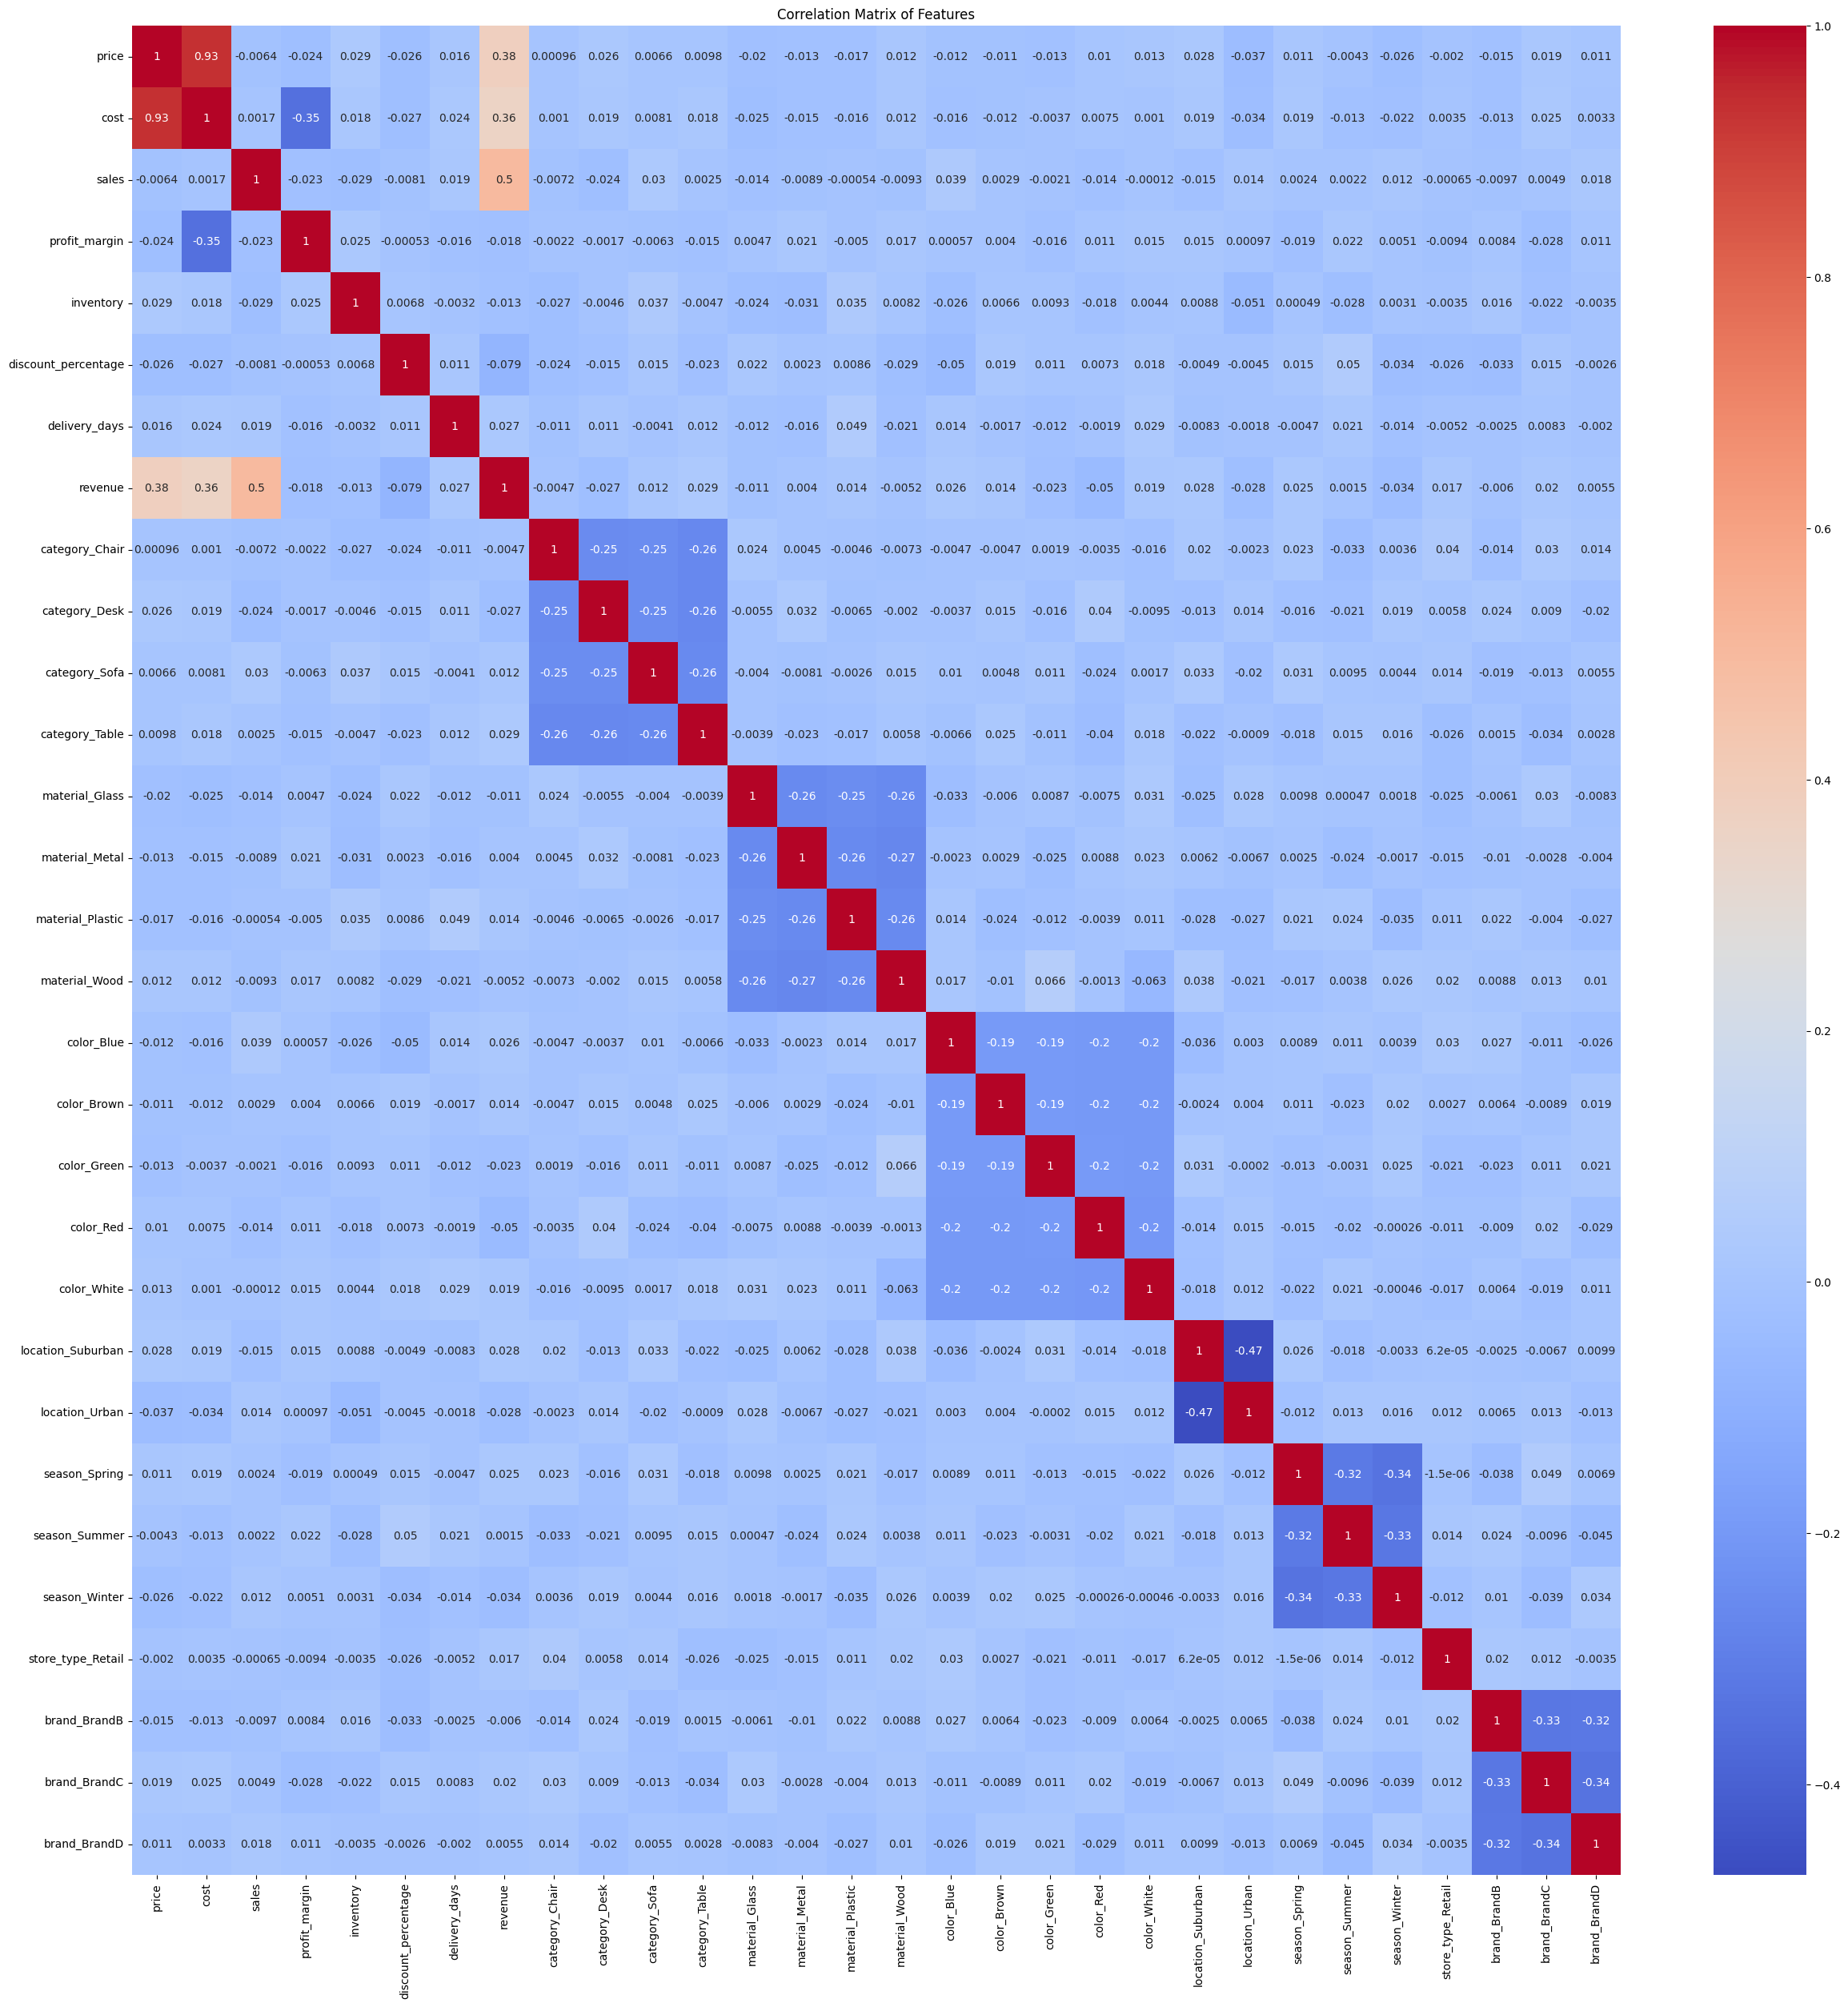

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

# **2) Build and Train Regression Models**

**a) Choose different regression models (e.g., Linear Regression, Ridge Regression, Lasso
Regression, and Polynomial Regression). Train them using the features and target variable.**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

**b) Train these models with Feature Normalization and Standardization as well.**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols = ['price', 'cost', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days']
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

In [ ]:
df_scaled

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,-0.427533,-0.104688,40,-1.153872,0.126455,1.490613,1.604841,3949.165238,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1.553623,1.959031,7,-0.935427,1.636748,1.391688,0.432283,-3521.002258,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0.801561,0.860361,32,-0.273070,-0.672091,0.812141,-1.131128,14285.560219,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0.343091,0.912147,48,-1.599589,-0.915127,-0.456816,-1.131128,12261.073703,False,False,...,False,False,False,False,True,False,True,False,False,True
4,-1.178912,-1.239577,19,1.020630,-1.088724,-1.364744,1.604841,-4588.255733,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.022532,0.419161,8,-1.396200,0.074376,-0.598389,1.604841,-3351.943350,True,False,...,True,True,False,False,False,False,True,True,False,False
2496,0.269578,-0.225723,24,1.301850,-1.540076,0.799020,1.213989,-445.621346,False,False,...,False,False,True,False,True,False,True,False,False,True
2497,1.260882,0.866997,48,0.578934,0.508368,-1.407258,0.432283,25809.096038,False,True,...,False,False,False,False,True,False,False,False,False,True
2498,1.656863,2.171604,38,-1.113043,-1.592155,0.560759,-0.349422,18963.246944,False,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
X = df_scaled.drop(columns=['revenue'])
y = df_scaled[['revenue']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [ ]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 1750 samples
Test set size: 750 samples


# **3) Evaluate Model Performance**

**a) Predict the target variable using the trained models and calculate the Mean Squared Error (MSE).**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.2f}")

Linear Regression MSE: 31459216.15


In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge:.2f}")

Ridge Regression MSE: 31450676.47


In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

Lasso Regression MSE: 31457017.45


In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

Lasso Regression MSE: 31457017.45


In [ ]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly:.2f}")

Polynomial Regression MSE: 35597046.74


**b) Compare the performance of the chosen regression models with and without feature scaling.**

**Without Feature Scaling**

In [ ]:
X = df_encoded.drop(columns=['revenue'])
y = df_encoded[['revenue']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [ ]:
linear_model.fit(X_train, y_train)
mse_linear = mean_squared_error(y_test, linear_model.predict(X_test))

ridge_model.fit(X_train, y_train)
mse_ridge = mean_squared_error(y_test, ridge_model.predict(X_test))

lasso_model.fit(X_train, y_train)
mse_lasso = mean_squared_error(y_test, lasso_model.predict(X_test))

poly_model.fit(X_train, y_train)
mse_poly = mean_squared_error(y_test, poly_model.predict(X_test))


In [ ]:
print("Without Feature Scaling:")
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}")

Without Feature Scaling:
Linear Regression MSE: 31655386.94
Ridge Regression MSE: 31650543.11
Lasso Regression MSE: 31653739.69
Polynomial Regression MSE: 35332515.14


**With Feature Scaling**

In [ ]:
X = df_scaled.drop(columns=['revenue'])
y = df_scaled[['revenue']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model.fit(X_train, y_train)
mse_linear_scaled = mean_squared_error(y_test, linear_model.predict(X_test))

ridge_model.fit(X_train, y_train)
mse_ridge_scaled = mean_squared_error(y_test, ridge_model.predict(X_test))

lasso_model.fit(X_train, y_train)
mse_lasso_scaled = mean_squared_error(y_test, lasso_model.predict(X_test))

poly_model.fit(X_train, y_train)
mse_poly_scaled = mean_squared_error(y_test, poly_model.predict(X_test))


In [ ]:
print("\nWith Feature Scaling:")
print(f"Linear Regression MSE: {mse_linear_scaled:.2f}")
print(f"Ridge Regression MSE: {mse_ridge_scaled:.2f}")
print(f"Lasso Regression MSE: {mse_lasso_scaled:.2f}")
print(f"Polynomial Regression MSE: {mse_poly_scaled:.2f}")


With Feature Scaling:

Linear Regression MSE: 31459216.15

Ridge Regression MSE: 31450676.47


Lasso Regression MSE: 31457017.45

Polynomial Regression MSE: 35597046.74


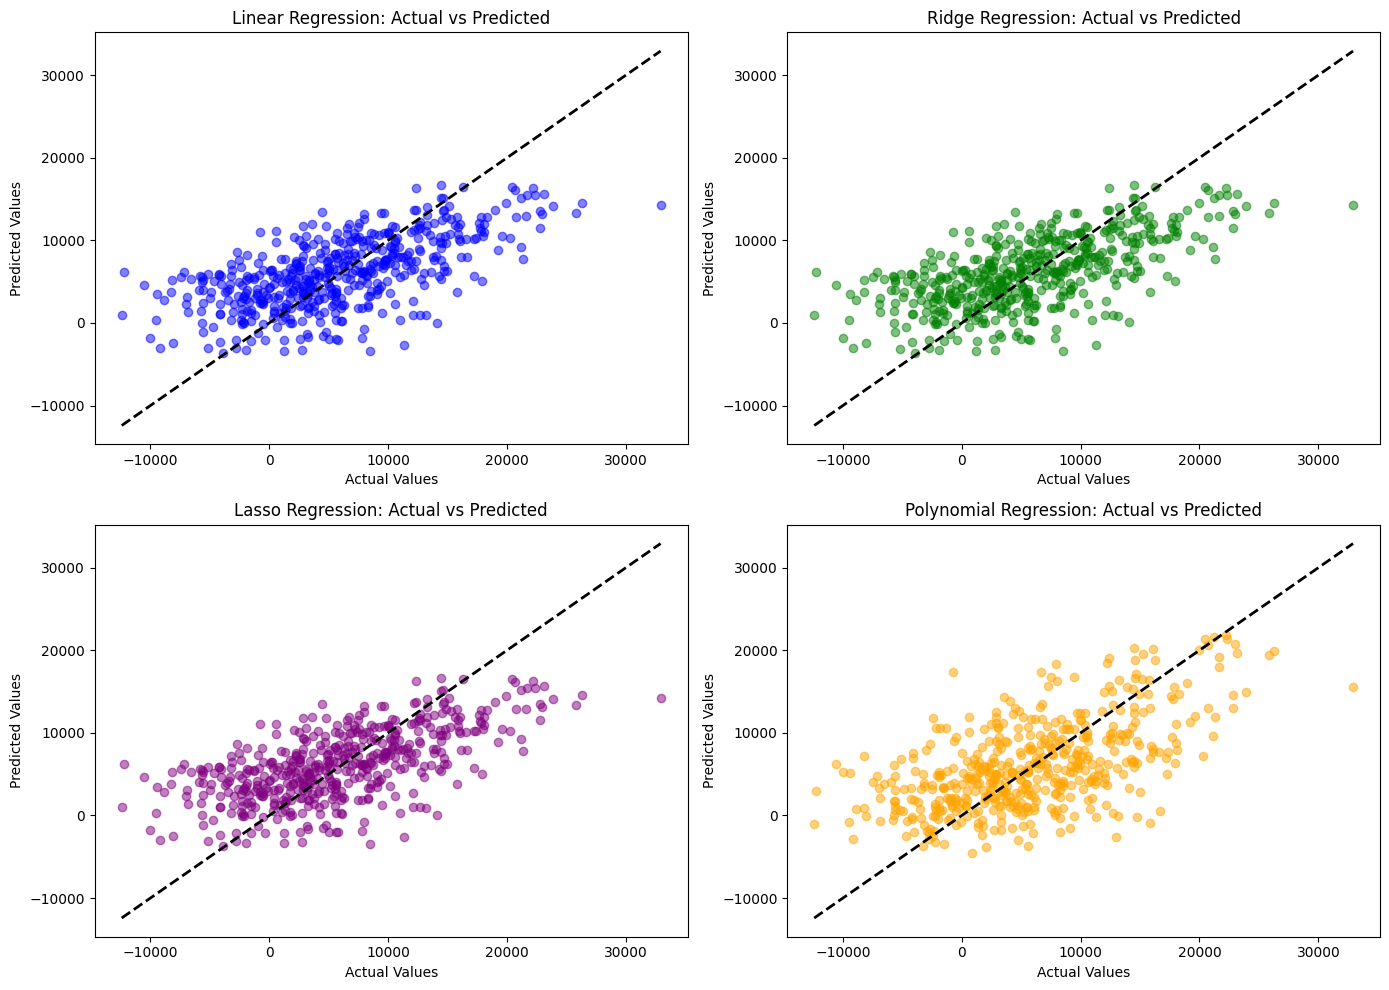

In [ ]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)

plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Ridge Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Lasso Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_lasso, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Polynomial Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_poly, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


**d) Take a random test sample and predict its value.**

In [ ]:
random_index = np.random.randint(0, X_test.shape[0])
sample = X_test.iloc[random_index]

In [ ]:
predicted_value = linear_model.predict([sample])
print(f"Random Test Sample (Index: {random_index}):\n{sample}\n")
print(f"Predicted Revenue : {predicted_value}")

Random Test Sample (Index: 149):
price                  1.132531
cost                   0.486729
sales                        17
profit_margin           1.13027
inventory             -1.574795
discount_percentage    0.352123
delivery_days          0.432283
category_Chair            False
category_Desk              True
category_Sofa             False
category_Table            False
material_Glass            False
material_Metal            False
material_Plastic          False
material_Wood              True
color_Blue                False
color_Brown               False
color_Green                True
color_Red                 False
color_White               False
location_Suburban         False
location_Urban            False
season_Spring             False
season_Summer             False
season_Winter             False
store_type_Retail         False
brand_BrandB              False
brand_BrandC              False
brand_BrandD               True
Name: 2149, dtype: object

Predicted Re

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
$predicted_value = ridge_model.predict([sample])
print(f"Random Test Sample (Index: {random_index}):\n{sample}\n")
print(f"Predicted Revenue and Sales: {predicted_value}")

Random Test Sample (Index: 149):
price                  1.132531
cost                   0.486729
sales                        17
profit_margin           1.13027
inventory             -1.574795
discount_percentage    0.352123
delivery_days          0.432283
category_Chair            False
category_Desk              True
category_Sofa             False
category_Table            False
material_Glass            False
material_Metal            False
material_Plastic          False
material_Wood              True
color_Blue                False
color_Brown               False
color_Green                True
color_Red                 False
color_White               False
location_Suburban         False
location_Urban            False
season_Spring             False
season_Summer             False
season_Winter             False
store_type_Retail         False
brand_BrandB              False
brand_BrandC              False
brand_BrandD               True
Name: 2149, dtype: object

Predicted Re

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [ ]:
predicted_value = lasso_model.predict([sample])
print(f"Random Test Sample (Index: {random_index}):\n{sample}\n")
print(f"Predicted Revenue and Sales: {predicted_value}")

Random Test Sample (Index: 149):
price                  1.132531
cost                   0.486729
sales                        17
profit_margin           1.13027
inventory             -1.574795
discount_percentage    0.352123
delivery_days          0.432283
category_Chair            False
category_Desk              True
category_Sofa             False
category_Table            False
material_Glass            False
material_Metal            False
material_Plastic          False
material_Wood              True
color_Blue                False
color_Brown               False
color_Green                True
color_Red                 False
color_White               False
location_Suburban         False
location_Urban            False
season_Spring             False
season_Summer             False
season_Winter             False
store_type_Retail         False
brand_BrandB              False
brand_BrandC              False
brand_BrandD               True
Name: 2149, dtype: object

Predicted Re

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
predicted_value = poly_model.predict([sample])
print(f"Random Test Sample (Index: {random_index}):\n{sample}\n")
print(f"Predicted Revenue and Sales: {predicted_value}")

Random Test Sample (Index: 149):
price                  1.132531
cost                   0.486729
sales                        17
profit_margin           1.13027
inventory             -1.574795
discount_percentage    0.352123
delivery_days          0.432283
category_Chair            False
category_Desk              True
category_Sofa             False
category_Table            False
material_Glass            False
material_Metal            False
material_Plastic          False
material_Wood              True
color_Blue                False
color_Brown               False
color_Green                True
color_Red                 False
color_White               False
location_Suburban         False
location_Urban            False
season_Spring             False
season_Summer             False
season_Winter             False
store_type_Retail         False
brand_BrandB              False
brand_BrandC              False
brand_BrandD               True
Name: 2149, dtype: object

Predicted Re

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
df.iloc[146]

,146
price,324.30395
cost,286.269559
sales,47
profit_margin,11.728007
inventory,99
discount_percentage,14.1142
delivery_days,5
category,Chair
material,Wood
color,Blue
